In [1]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR

#Faiza's code
#Initial code cleanup
filename_read = '/Users/valliramaswamy/Documents/MSci Data Science/Year-3/2IntrotoAI/group3CW/Clean_Dataset.csv'
df =pd.read_csv(filename_read, index_col = 0)

#Sorting values by airline
df = df.sort_values(by='airline', ascending=True)

#Checking overall and asking for sum of null values
df.isnull().values.all().sum()

# Dropping Flight column
df.drop('flight', 1, inplace=True)

# Changing price to Pounds
df["price"] = (df["price"]*0.011).round(2)

# Printinf dataset
print(df)

        airline source_city departure_time        stops arrival_time  \
184894  AirAsia     Chennai          Night          one      Morning   
186660  AirAsia     Chennai        Morning  two_or_more   Late_Night   
186659  AirAsia     Chennai        Morning          one   Late_Night   
186658  AirAsia     Chennai        Morning  two_or_more        Night   
186657  AirAsia     Chennai        Morning          one        Night   
...         ...         ...            ...          ...          ...   
211524  Vistara       Delhi        Evening          one        Night   
87243   Vistara   Bangalore        Evening          one   Late_Night   
87244   Vistara   Bangalore        Morning          one    Afternoon   
87482   Vistara   Bangalore        Morning          one      Evening   
300152  Vistara     Chennai        Morning          one      Evening   

       destination_city     class  duration  days_left   price  
184894            Delhi   Economy     10.92         33   27.25  
18666

<ipython-input-1-6eb732cbdb3c>:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('flight', 1, inplace=True)


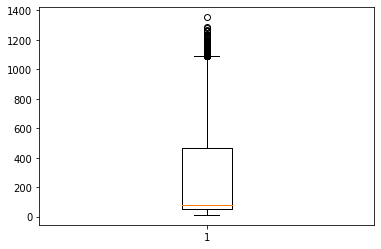

229.78609928936243
249.67505500334298
Counter({0: 289222, 1: 10931})
(289222, 11)


<ipython-input-2-e3c83bf4de1e>:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('price_outlier', 1, inplace=True)
<ipython-input-2-e3c83bf4de1e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('price_outlier', 1, inplace=True)


In [2]:
plt.boxplot(df['price'])
plt.show()

# Valli's code
# Feature Engineering: removing outliers & adding new logged price column

# Creates a new column in the dataframe named 'price outlier'
df['price_outlier'] = 0

#to find the mean and standard deviation of the price values to work out the outlier
price_mean = np.mean(df['price'])
print(price_mean)
price_std = np.std(df['price'])
print(price_std)

#calculation to assign 0 or 1 to the price values (0 if the datapoint is not an outlier & 1 if it is)
df.loc[abs(df['price'] - price_mean) > 2 * price_std,'price_outlier'] = 1

#This counts the number of unique outlier values
print(Counter(df['price_outlier']))

df = df[df.price_outlier != 1]
print (df.shape)

# Dropping 'price outlier' column
df.drop('price_outlier', 1, inplace=True)

In [3]:
#Aakash's code

le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

# Find unique values within the stops column
print(list(set(df['stops'])))

# Match and replace the numerical values in text with integers
df['stops'] = df['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])

print(df)

<ipython-input-3-c4200ae9b491>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline'] = le.fit_transform(df['airline'])
<ipython-input-3-c4200ae9b491>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_city'] = le.fit_transform(df['source_city'])
<ipython-input-3-c4200ae9b491>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

['zero', 'one', 'two_or_more']
        airline  source_city  departure_time  stops  arrival_time  \
184894        0            1               5      1             4   
186660        0            1               4      2             3   
186659        0            1               4      1             3   
186658        0            1               4      2             5   
186657        0            1               4      1             5   
...         ...          ...             ...    ...           ...   
211525        5            2               2      1             5   
211524        5            2               2      1             5   
87243         5            0               2      1             3   
87244         5            0               4      1             0   
87482         5            0               4      1             2   

        destination_city  class  duration  days_left   price  
184894                 2      1     10.92         33   27.25  
186660        

<ipython-input-3-c4200ae9b491>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = le.fit_transform(df['class'])
<ipython-input-3-c4200ae9b491>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stops'] = df['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])


In [ ]:
#X = df.iloc[:, [0, 8]].values.reshape(-1,1)
#y = df.iloc[:, 9].values.reshape(-1,1)

#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

result = []
for x in df.columns:
    if x != 'price':
        result.append(x)
        
X = df[result].values
y = df['price'].values

# Use 5-fold split with RBF kernal
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    svr_model = SVR(kernel = 'rbf', C=1)
    svr_model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = svr_model.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

In [ ]:
X = df.iloc[:, [0, 8]].values.reshape(-1,1)
y = df.iloc[:, 9].values.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
    
best_svr.fit(X_train, y_train)
scores.append(best_svr.score(X_test, y_test))